<a href="https://colab.research.google.com/github/ritiksaini469/TSF-Data-Science-Internship/blob/main/Task_2%20Prediction_using_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP : The Sparks Foundation**
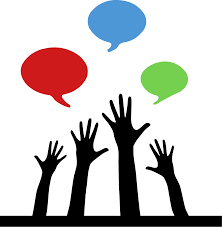

### **Data Science & Business Analytics Intern**

### **Author:  Ritik Saini**


### **Task 1 : Prediction using Unsupervised Machine Learning**


**Description:** From the given Iris dataset predict the optimum number of clusters and represent it visually.

**Dataset :-** https://bit.ly/3kXTdox

### **Step 1 - Importing Libraries**

In [ ]:
import numpy as np                                # Linear algebra
import pandas as pd                               # Data processing
import matplotlib.pyplot as plt                   # Data Visualization 
import seaborn as sns                             # Python library for Visualization

### **Step 2 - Reading data from Dataset**

---



In [ ]:
data = pd.read_csv("/content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.shape

(150, 6)

**DataFrame - shape Function**

**The shape function is used to find the number of rows and columns.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Pandas DataFrame info() Method**

**The info() method prints information about the DataFrame.**

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Pandas DataFrame describe() Method**

**The describe() method returns description of the data in the DataFrame.**

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Dataframe. isnull().sum().**

**Returns the number of missing values in the data set.**

# **Step 2 - Visualizing Dataset**

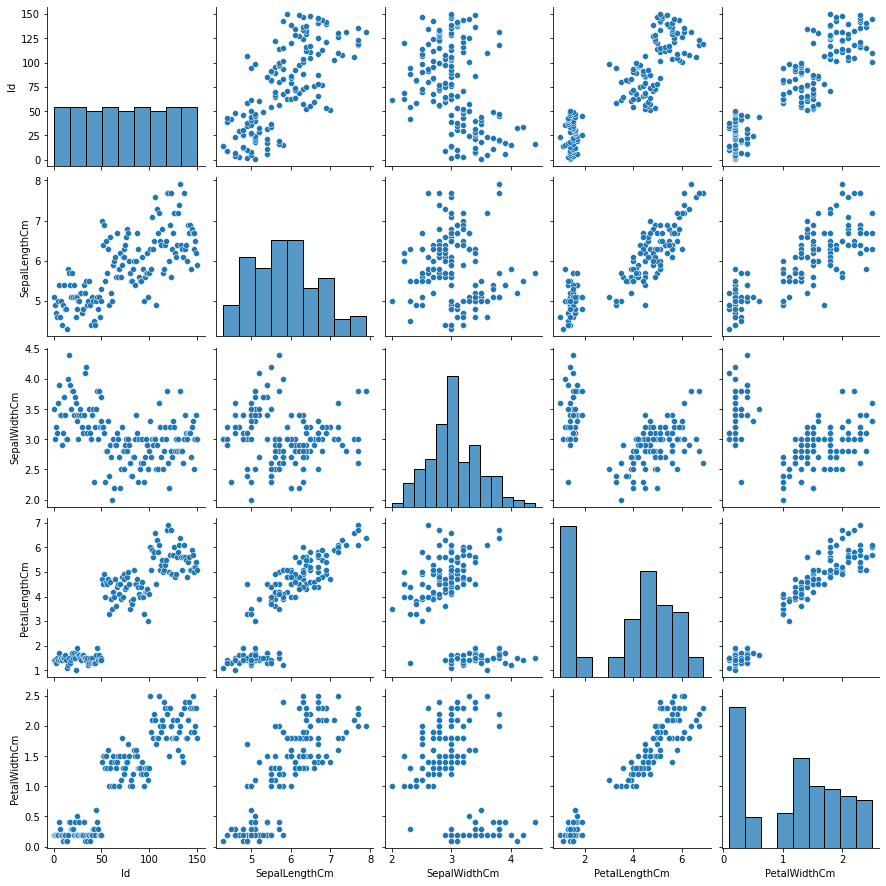

In [ ]:
sns.pairplot(data=data)

# **Step 3 - Plotting a line graph using elbow method**

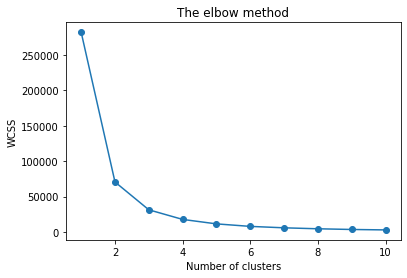

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []  # Array that will store 'within cluster sum of Sqaures' for all 10 values of k

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


# **Step 3 - Applying kmeans to the Dataset**

In [ ]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# **Step 3 - Cluster visualizaton of Sepal length and its width**

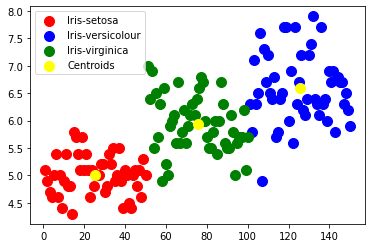

In [ ]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# **Step 3 - Cluster visualizaton of Petal length and its width**

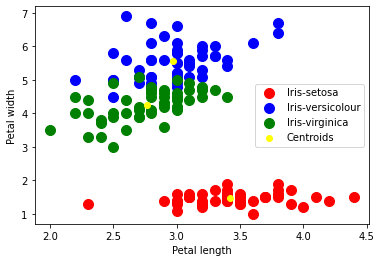

In [ ]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],
            s = 100,c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],
            s = 100,c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100,c = 'green', label = 'Iris-virginica')

# Plotting the centriods of the clusters 
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],
            c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

**Conclusion :** Thus, it is observed that predicted number of clusters are equal to the number of clusters found by visualizing the same data.